### Visualization of title.ratings.csv
1: Number of shows per average rating range \
2: Find average popularity of shows by average rating

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import statistics as stats

In [12]:
titleRatings_df = pd.read_csv('dataset/originalDataset/title.ratings.csv', sep='\t', low_memory=False)
titleRatings_df.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1901
1,tt0000002,5.9,255
2,tt0000003,6.5,1697
3,tt0000004,5.7,167
4,tt0000005,6.2,2517
5,tt0000006,5.2,172
6,tt0000007,5.4,784
7,tt0000008,5.4,2042
8,tt0000009,5.3,198
9,tt0000010,6.9,6875


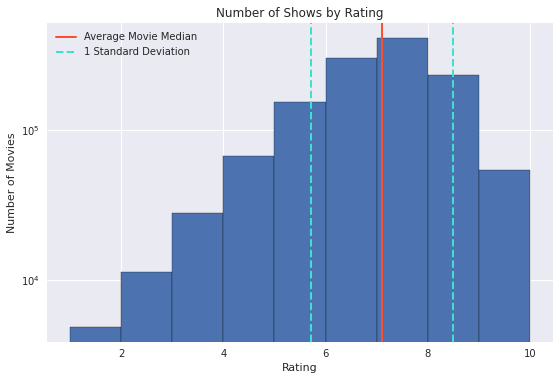

In [13]:
# 1: Number of shows per average rating range
plt.style.use('seaborn')

aveRating = titleRatings_df['averageRating']
bins = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# the log parameter allows us to see the data in a semi-log scale to see frequency of groups with smaller counts
plt.hist(aveRating, bins=bins, edgecolor='black', log=True)

median_rating = aveRating.median()
standardDev_rating = aveRating.std()

standardDev_left_1 = median_rating - standardDev_rating
standardDev_right_1 = median_rating + standardDev_rating

color_ratings = '#fc4f30'
color_1_std = '#40e0d0'

# Adds a median line allowing us to see infer information about the data
plt.axvline(median_rating, color=color_ratings, label='Average Movie Median', linewidth=2)
plt.axvline(standardDev_left_1, color=color_1_std, linestyle='--', label='1 Standard Deviation', linewidth=2)
plt.axvline(standardDev_right_1, color=color_1_std, linestyle='--', linewidth=2)

plt.legend()

plt.title('Number of Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')

plt.tight_layout()
#plt.savefig('Submission//Task1//ER_Number of Shows by averageRating.png', bbox_inches='tight')
plt.show()

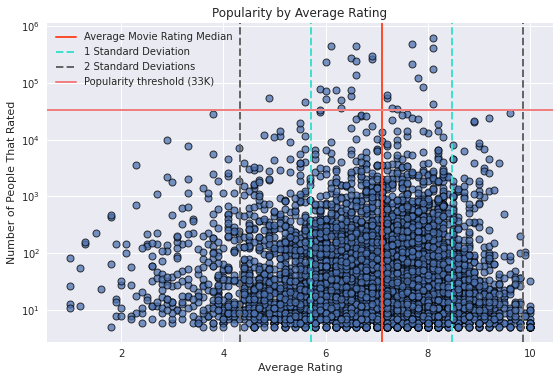

In [14]:
# 2. Find popularity of shows by average rating
plt.style.use('seaborn')

data_sample = titleRatings_df.sample(frac=0.005)
aveRating = data_sample['averageRating']
popularity = data_sample['numVotes']

# c param determines how much of a particular color (defined by cmap) a point will have
plt.scatter(aveRating, popularity, edgecolor='black', linewidth=1, alpha=0.75)

median_rating = aveRating.median()
standardDev_rating = aveRating.std()

standardDev_left_1 = median_rating - standardDev_rating
standardDev_right_1 = median_rating + standardDev_rating

standardDev_left_2 = median_rating - 2*standardDev_rating
standardDev_right_2 = median_rating + 2*standardDev_rating

color_ratings = '#fc4f30'
popThresh_color = '#f08080'
color_1_std = '#40e0d0'
color_2_std = '#666666'


# Adds a median line allowing us to see infer information about the data
plt.axvline(median_rating, color=color_ratings, label='Average Movie Rating Median', linewidth=2)

plt.axvline(standardDev_left_1, color=color_1_std, linestyle='--', label='1 Standard Deviation', linewidth=2)
plt.axvline(standardDev_right_1, color=color_1_std, linestyle='--', linewidth=2)

plt.axvline(standardDev_left_2, color=color_2_std, linestyle='--', label='2 Standard Deviations', linewidth=2)
plt.axvline(standardDev_right_2, color=color_2_std, linestyle='--', linewidth=2)

plt.axhline(33000, color=popThresh_color, label='Popularity threshold (33K)', linewidth=2)

# cbar = plt.colorbar()
# cbar.set_label('Like/Dislike Ratio')

# plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.title('Popularity by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of People That Rated')

plt.tight_layout()
#plt.savefig('Results for Report//p2Task1 Results//ER_Popularity by Average Rating.png', bbox_inches='tight')
plt.show()

### Visualization of title.akas.csv
Number of adaptations for an original title. Uses attributes titleId and isOriginalTitle
1. Bins of number of adaptions, the bins count how many original titles were adopted
2. Num of films per region (pick the top ten regions with the most movies)

In [15]:
titleAkas_df = pd.read_csv('dataset/originalDataset/title.akas.csv', sep='\t', low_memory=False, nrows=1000000)
titleAkas_df.head(10)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
6,tt0000001,7,Carmencita,\N,\N,original,\N,1
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
9,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0


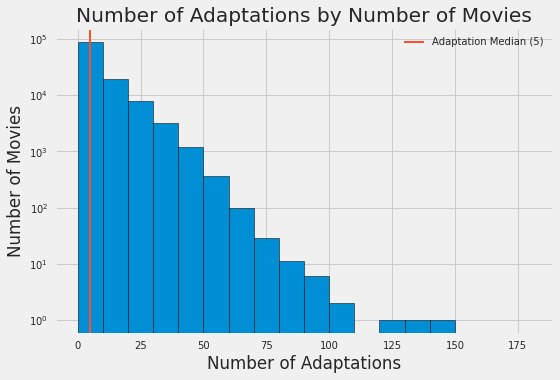

In [16]:
#1 Find the number of adaptations for each titleId

# Create the x- and y-axis
series_akas = titleAkas_df["titleId"]

counter = Counter()

# find the number of adaptations
for index, aka in series_akas.items(): 
    counter.update([aka])

adaptation_cnts = []

for id_title, adaptation_cnt in counter.items():
    adaptation_cnts.append(adaptation_cnt)

#Visualize above information
plt.style.use('fivethirtyeight')

bins = [10*i for i in range(19)]

# the log parameter allows us to see the data in a semi-log scale to see frequency of groups with smaller counts
plt.hist(adaptation_cnts, bins=bins, edgecolor='black', log=True)

# Find median
median_adaptation = stats.median(adaptation_cnts)
color = '#fc4f30'
plt.axvline(median_adaptation, color=color, label=f'Adaptation Median ({median_adaptation})', linewidth=2)

plt.legend()

plt.title('Number of Adaptations by Number of Movies')
plt.ylabel('Number of Movies')
plt.xlabel('Number of Adaptations')

plt.tight_layout()
#plt.savefig('image.png', bbox_inches='tight')
plt.show()

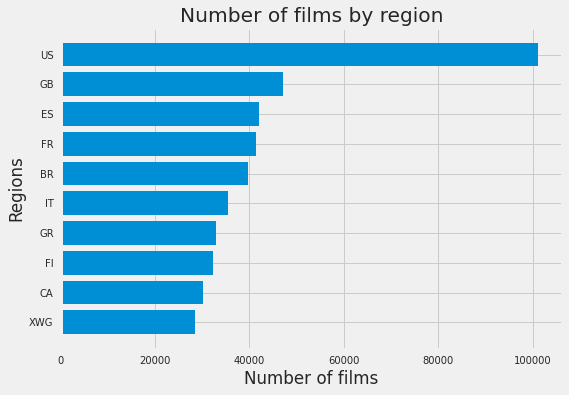

In [10]:
# 2: # of films per region (pick the top ten regions with the most movies)
# Create the x- and y-axis
df_region = titleAkas_df[titleAkas_df['region'] != '\\N']
series_region = df_region["region"]

counter = Counter()

# find the number of adaptations
for index, region in series_region.items(): 
    counter.update([region])

regions = []
region_film_counts = []

for region_name, region_count in counter.most_common(10):
    regions.append(region_name)
    region_film_counts.append(region_count)

regions.reverse()
region_film_counts.reverse()

# Visualize above code
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

plt.barh(regions, region_film_counts) # Use this when text labels in the x-axis become too long
# plt.xscale('log')

plt.title("Number of films by region")
plt.xlabel("Number of films")
plt.ylabel("Regions")
#plt.savefig('image.png', bbox_inches='tight')
plt.show()

### Visualization of title.basics.csv

In [17]:
titleBasics_df = pd.read_csv('dataset/originalDataset/title.basics.csv', sep='\t', low_memory=False)
titleBasics_df.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


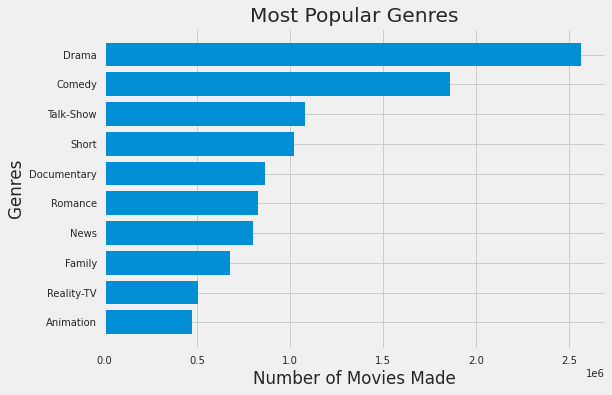

In [20]:
# Visual #1: For title.basics: Movie Genres vs Number of Movies Made per Genre
from collections import Counter
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

# Create the x- and y-axis
df_genres = titleBasics_df["genres"]

counter = Counter()

for index, genre in df_genres.items():
    if type(genre) is str:
        some_genres = genre.split(",")
        counter.update(some_genres)
        
genres = []
num_movies = []

for genre, mov_count in counter.most_common(10):
    genres.append(genre)
    num_movies.append(mov_count)

genres.reverse()
num_movies.reverse()

plt.barh(genres, num_movies) # Use this when text labels in the x-axis become too long
# plt.xscale('log')

plt.title("Most Popular Genres")
plt.ylabel("Genres")
plt.xlabel("Number of Movies Made")
plt.show()

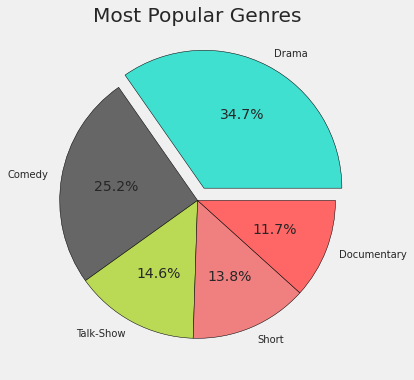

In [21]:
# Visual 2: For title.basics
plt.style.use("fivethirtyeight")

# Create the x- and y-axis
df_genres = titleBasics_df["genres"]

counter = Counter()
for index, genre in df_genres.items():
    # Some genres are 'nan'
    if type(genre) is str:
        some_genres = genre.split(",")
        counter.update(some_genres)

genres = []
num_movies = []
colors = ['#40e0d0','#666666','#bada55','#f08080','#ff6666', '#00ff00']

for genre, mov_count in counter.most_common(5):
    genres.append(genre)
    num_movies.append(mov_count)

explode = [0.1, 0, 0, 0, 0]
plt.pie(num_movies, labels = genres, explode=explode, colors=colors, autopct = '%1.1f%%', 
        wedgeprops= {"edgecolor":"black"})

plt.title("Most Popular Genres")
plt.tight_layout()
plt.show()

['Non-adult', 'Adult']


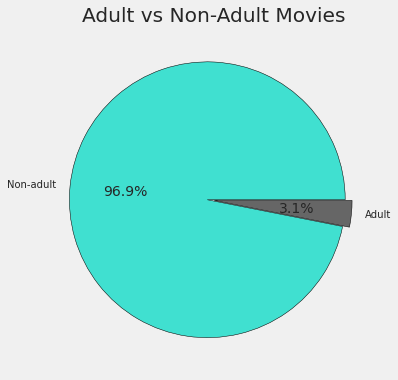

In [22]:
plt.style.use("fivethirtyeight")
# Create the x- and y-axis
df_isAdult = titleBasics_df["isAdult"]

counter = Counter()

for isAdult in df_isAdult:
    if type(isAdult) is str:
        if isAdult == '1':
            counter.update(["Adult"])
        else:
            counter.update(["Non-adult"])

isAdult = []
num_isAdult_movies = []
colors = ['#40e0d0','#666666']

for adult, isAdult_count in counter.most_common(2):
    isAdult.append(adult)
    num_isAdult_movies.append(isAdult_count)

print(isAdult)
explode = [0.05, 0]
plt.pie(num_isAdult_movies, labels = isAdult, explode=explode, colors=colors, autopct = '%1.1f%%', 
        wedgeprops= {"edgecolor":"black"})

plt.title("Adult vs Non-Adult Movies")
plt.tight_layout()
plt.show()

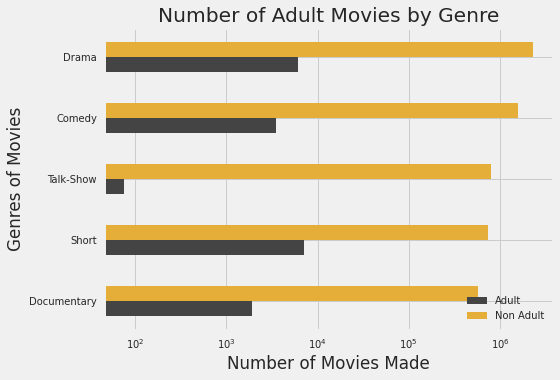

In [27]:
# Combines information of isAdult and Movie genres
# Try to find the number of isAdult films per genre
plt.style.use("fivethirtyeight")

# find all the dataframes for each genres

df_genres = titleBasics_df["genres"] # a Series object
counter = Counter()

for genre in df_genres:
    # Some genres are 'nan'
    if type(genre) is str:
        some_genres = genre.split(",")
        counter.update(some_genres)

genres = []

for genre, mov_count in counter.most_common(5):
    genres.append(genre)


# find the number of adult and non-adult films in those genres
isAdult_y = []
isNonAdult_y = []

for genre in genres:
    genre_rows = titleBasics_df[titleBasics_df['genres'].str.contains(genre, na=False)] # dataframe object
    isAdult_y.append(len(genre_rows[genre_rows['isAdult'] == "1"]))
    isNonAdult_y.append(len(genre_rows) - isAdult_count)

genres.reverse()
isAdult_y.reverse()
isNonAdult_y.reverse()


################# Visualize Information Above ###################

x_indexes = np.arange(len(genres))
width = 0.25

plt.barh(x_indexes - (width/2), isAdult_y, height=width, color="#444444", label="Adult")
plt.barh(x_indexes + (width/2), isNonAdult_y, height=width, color="#e5ae38", label="Non Adult")

plt.xscale('log')

plt.legend(loc="lower right")
plt.yticks(x_indexes, labels=genres) # name for each x-tick
plt.title("Number of Adult Movies by Genre")
plt.xlabel("Number of Movies Made")
plt.ylabel("Genres of Movies")

plt.tight_layout()
plt.show()

In [28]:
# Medians of runtime for titletypes
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter

plt.style.use("fivethirtyeight")

# find the most occuring titleType
df_titleType = titleBasics_df[~titleBasics_df['titleType'].isnull()] # df with no n/a's
series_titleType = df_titleType['titleType'] # series with no n/a's
counter = Counter()

for titleType in series_titleType:
    # Some genres are 'nan'
    if type(titleType) is str:
        counter.update([titleType])

most_occuring_titleType = []

for titleType, count in counter.most_common(50):
    most_occuring_titleType.append(titleType)

# find the median runtime for each titleType
medians = []
df_runtime = df_titleType['runtimeMinutes']

for titleType in most_occuring_titleType:
    temp_df_runtime = df_titleType[df_titleType['titleType'] == titleType]
    series_runtime = temp_df_runtime['runtimeMinutes']
    result = series_runtime.str.replace('\D', '0', regex=True)

    titleMedian = result.median(skipna=True)
    medians.append(titleMedian)


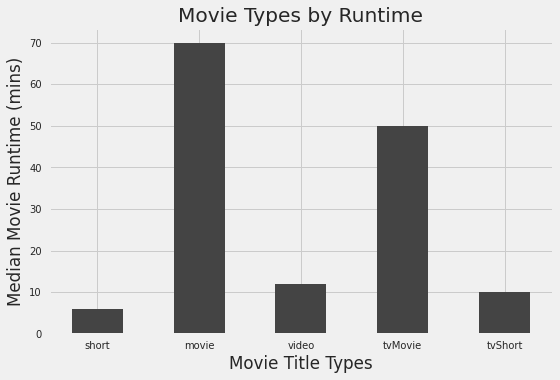

In [30]:
n_titleType = []
n_medians = []

for index, value in enumerate(medians):
    if value > 0:
        n_titleType.append( most_occuring_titleType[index] )
        n_medians.append(value)

# Visualize titleType vs median runtime

plt.style.use("fivethirtyeight")

width = 0.50

plt.bar(n_titleType, n_medians, width=width, color="#444444")

plt.title("Movie Types by Runtime")
plt.xlabel("Movie Title Types")
plt.ylabel("Median Movie Runtime (mins)")

plt.tight_layout()
plt.show()

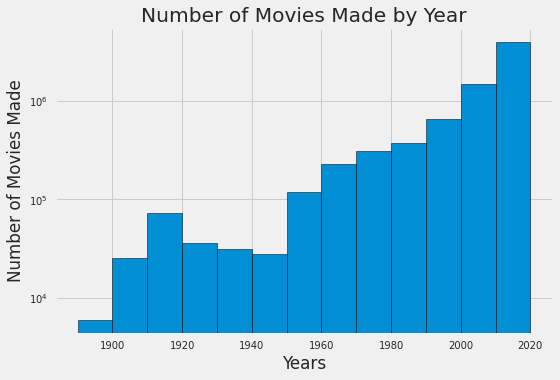

In [31]:
df_startYear = titleBasics_df[~titleBasics_df['startYear'].isnull()] # df with no n/a's
series_startYear = df_startYear['startYear'] # series with no n/a's

years = []

for startYear in series_startYear:
    # Some genres are 'nan', keep track of the count for every year
    if type(startYear) is str and startYear.isnumeric():
        years.append(int(startYear))

# Number of movies made from 1920 to 2020

plt.style.use('fivethirtyeight')

bins = [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

# the log parameter allows us to see the data in a semi-log scale to see frequency of groups with smaller counts
plt.hist(years, bins=bins, edgecolor='black', log=True)

plt.title('Number of Movies Made by Year')
plt.xlabel('Years')
plt.ylabel('Number of Movies Made')

plt.tight_layout()
plt.show()